<a href="https://colab.research.google.com/github/ozcanmiraay/Capstone-Carbon-Aware-LLM-Inference/blob/main/October_23_Miray_Capstone_Updates_(Time_Series_MFU_Trials).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Definitions

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def remove_around_word(text):
    return text.strip(".json")  # This removes double quotes around the word

In [ ]:
# Plot MFU over Time

def plot_mfu_over_time(file_name, stage, color='teal'):

  file_name = remove_around_word(file_name)

  with open(f'{file_name}') as f:
      data = json.load(f)

  # Extract the distribution data
  distribution = data[f'{file_name}_distribution']
  print("Distribution length:", len(distribution))

  # Separate the time and MFU values into two lists
  time_values = [entry['time'] for entry in distribution]
  mfu_values = [entry['mfu'] for entry in distribution]

  time_differences = []
  for i in range(1, len(time_values)):
      time_diff = time_values[i] - time_values[i - 1]
      time_differences.append(time_diff)
  print("Average batch stage execution time:", np.mean(time_differences))
  print("Max batch stage execution time:", np.max(time_differences))
  print("Min batch stage execution time:", np.min(time_differences))

  # Plotting the data
  plt.figure(figsize=(10, 6))
  plt.plot(time_values, mfu_values, marker='o', color=color)

  # Adding labels and title
  plt.title(f'MFU over Time for Stage:{stage}')
  plt.xlabel('Time (s)')
  plt.ylabel('MFU')

  # Show the plot
  plt.grid(True)
  plt.show()

In [ ]:
# Plot Average MFU over Time with Binning

def plot_avg_mfu_over_time(file_name, stage, color='teal', num_bins=100):

  file_name = remove_around_word(file_name)

  with open(f'{file_name}') as f:
      data = json.load(f)

  # Extract the distribution data
  distribution = data[f'{file_name}_distribution']
  print("Distribution length:", len(distribution))

  # Separate the time and MFU values into two lists
  time_values = [entry['time'] for entry in distribution]
  mfu_values = [entry['mfu'] for entry in distribution]

  # Define time intervals for aggregation
  time_bins = np.linspace(min(time_values), max(time_values), num=num_bins)

  # Calculate the average MFU per time bin
  mfu_averages = []
  for i in range(len(time_bins) - 1):
      mask = (time_values >= time_bins[i]) & (time_values < time_bins[i + 1])
      mfu_averages.append(np.mean(np.array(mfu_values)[mask]))

  # Plot the aggregated data
  plt.figure(figsize=(10, 6))
  plt.plot(time_bins[:-1], mfu_averages, marker='o', color=color)

  # Adding labels and title
  plt.title(f'Average MFU over Time for Stage:{stage}')
  plt.xlabel('Time (s)')
  plt.ylabel('MFU')

  plt.grid(True)
  plt.show()

# Example Simulation Config 1

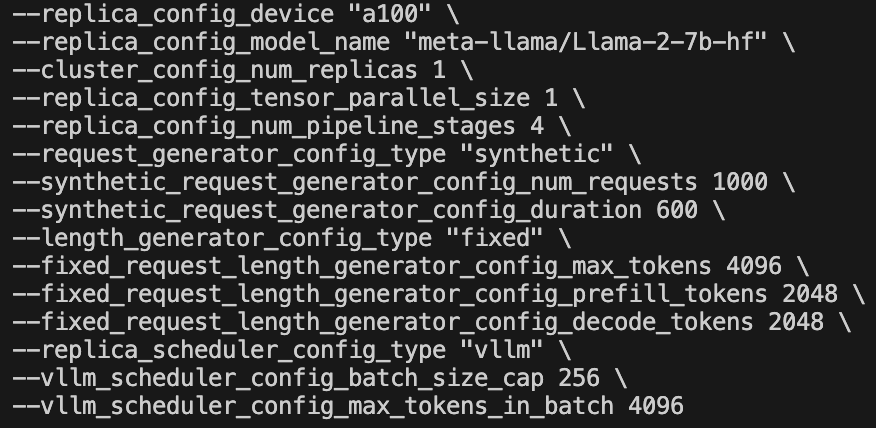

## Stage 1

Distribution length: 101573
Average batch stage execution time: 0.006711546582530317
Max batch stage execution time: 2.079937342449025
Min batch stage execution time: 0.0


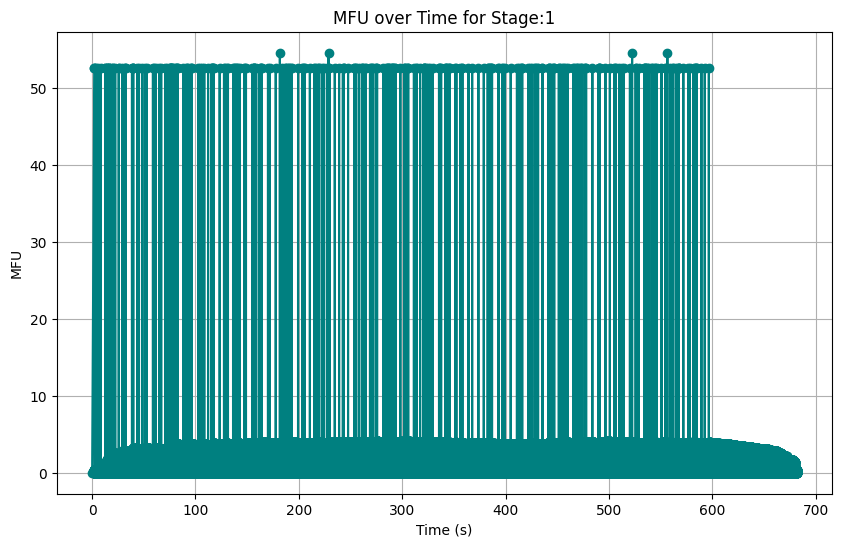

In [ ]:
plot_mfu_over_time("replica_1_stage_1_mfu", stage=1, color ='teal')

Distribution length: 101573


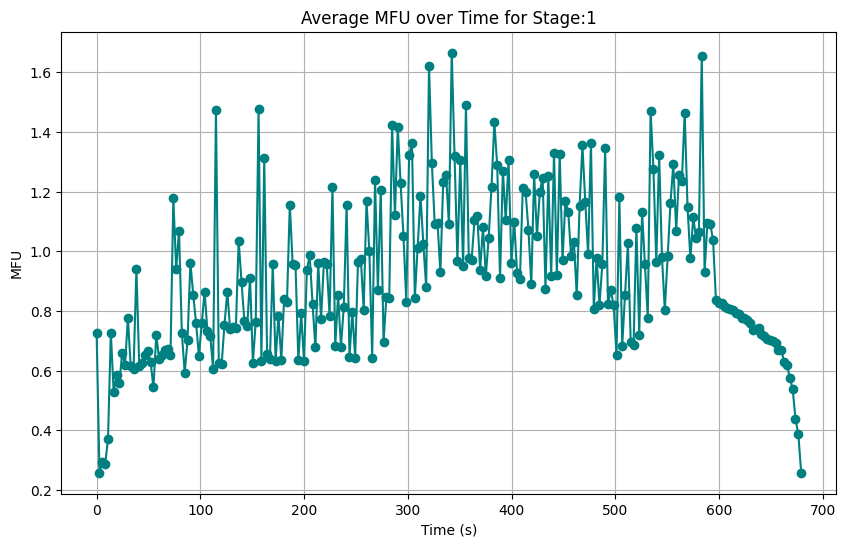

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_1_mfu", stage=1, color='teal', num_bins=250)

## Stage 2

Distribution length: 101573
Average batch stage execution time: 0.006711573220358038
Max batch stage execution time: 2.1197541103484476
Min batch stage execution time: 0.0


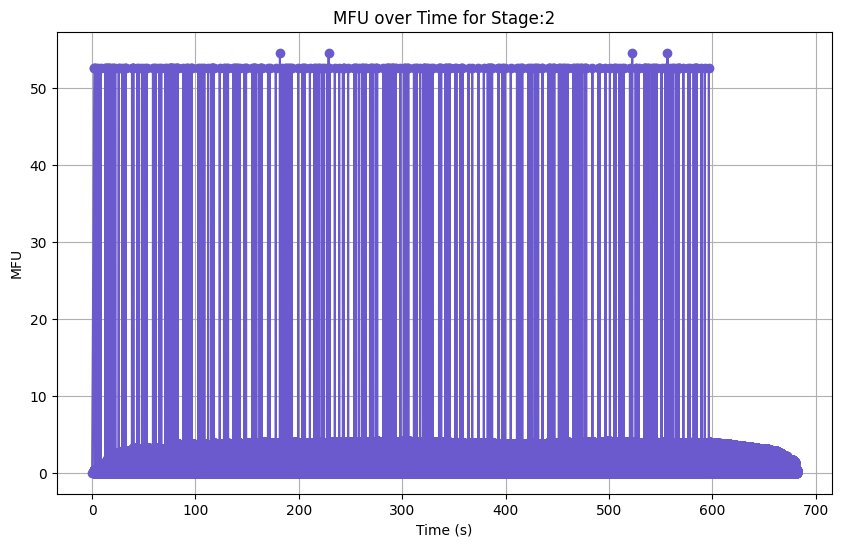

In [ ]:
plot_mfu_over_time("replica_1_stage_2_mfu", stage=2, color ='slateblue')

Distribution length: 101573


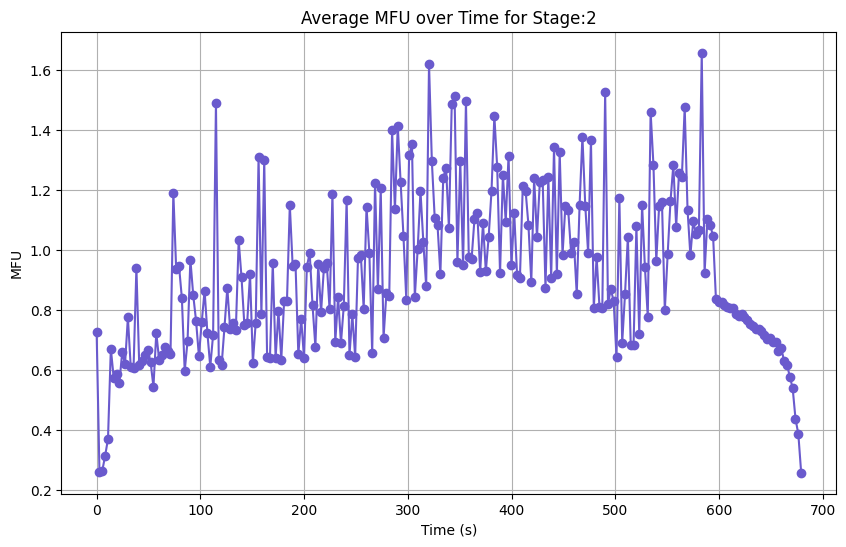

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_2_mfu", stage=2, color='slateblue', num_bins=250)

## Stage 3

Distribution length: 101573
Average batch stage execution time: 0.006711599763250523
Max batch stage execution time: 2.1595708782478704
Min batch stage execution time: 0.0


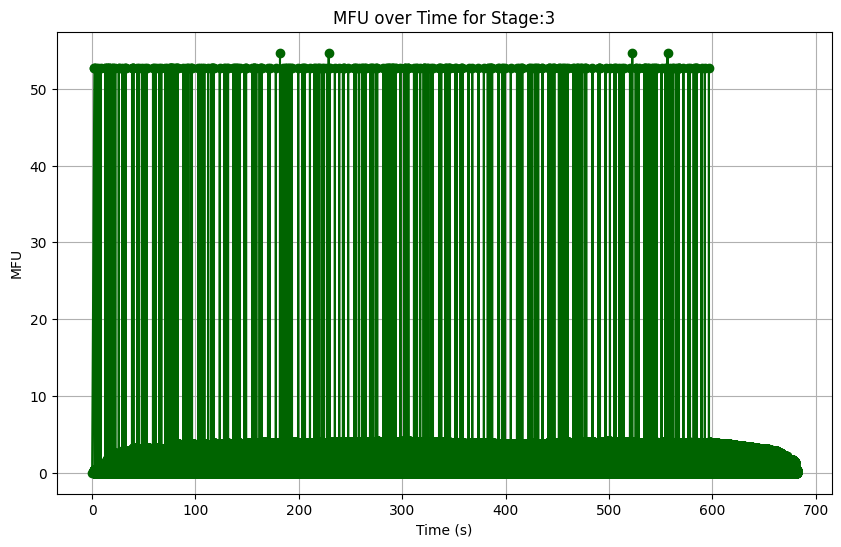

In [ ]:
plot_mfu_over_time("replica_1_stage_3_mfu", stage=3, color ='darkgreen')

Distribution length: 101573


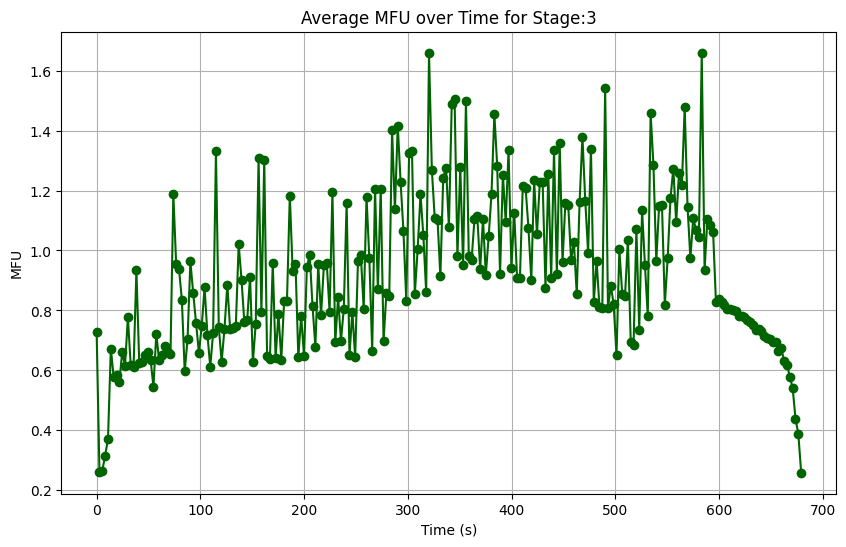

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_3_mfu", stage=3, color='darkgreen', num_bins=250)

## Stage 4

Distribution length: 101573
Average batch stage execution time: 0.006711519944702595
Max batch stage execution time: 2.040120574549602
Min batch stage execution time: 0.0


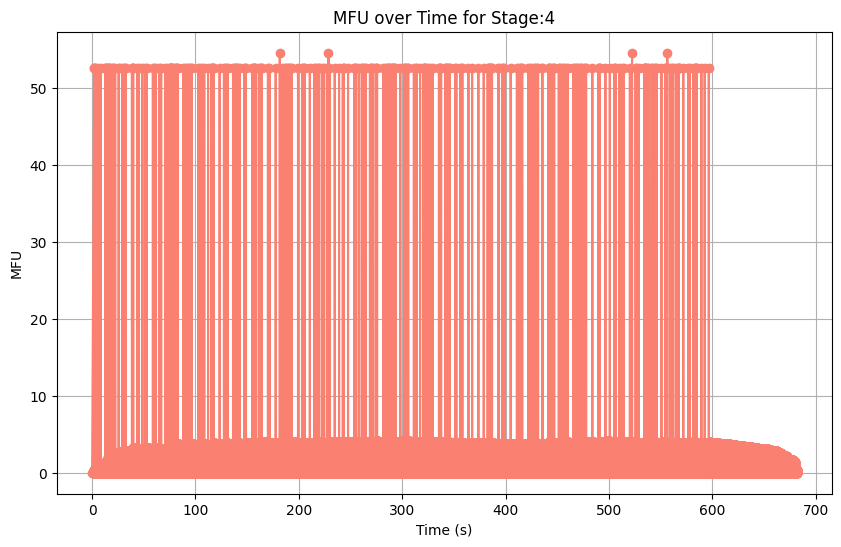

In [ ]:
plot_mfu_over_time("replica_1_stage_4_mfu", stage=4, color ='salmon')

Distribution length: 101573


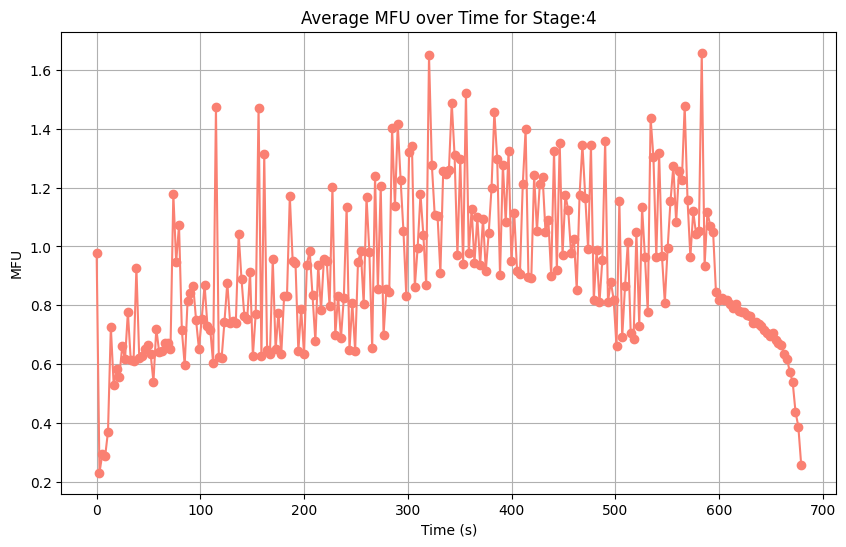

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_4_mfu", stage=4, color='salmon', num_bins=250)

## Weighted Mean Instead of Mean (To Account For Record Size Imbalance Within Bins)

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to plot Average MFU over Time with Weighted Binning
def plot_weighted_avg_mfu_over_time_mod(file_name, stage, color='teal', num_bins=100):

    # Load the JSON file
    with open(file_name) as f:
        data = json.load(f)

    # Extract the distribution data
    distribution = data[f'{file_name}_distribution']

    # Separate the time and MFU values into two lists
    time_values = [entry['time'] for entry in distribution]
    mfu_values = [entry['mfu'] for entry in distribution]

    # Define time intervals for aggregation
    time_bins = np.linspace(min(time_values), max(time_values), num=num_bins)

    # Initialize lists to store averages and bin counts
    mfu_averages = []
    bin_counts = []  # To count the number of values in each bin

    # Calculate the average MFU per time bin and count values in each bin
    for i in range(len(time_bins) - 1):
        mask = (time_values >= time_bins[i]) & (time_values < time_bins[i + 1])
        mfu_in_bin = np.array(mfu_values)[mask]

        # Count the number of time values in the current bin
        bin_count = len(mfu_in_bin)
        bin_counts.append(bin_count)

        # Calculate the average MFU in this bin, handling empty bins
        if bin_count > 0:
            mfu_averages.append(np.mean(mfu_in_bin))
        else:
            mfu_averages.append(0)

    # Calculate weighted averages based on bin counts
    total_samples = sum(bin_counts)
    weighted_mfu_averages = [(mfu_averages[i] * bin_counts[i] / total_samples) for i in range(len(bin_counts))]

    # Plot the weighted aggregated data
    plt.figure(figsize=(10, 6))
    plt.plot(time_bins[:-1], weighted_mfu_averages, marker='o', color=color)

    # Adding labels and title
    plt.title(f'Weighted Average MFU over Time for Stage: {stage}')
    plt.xlabel('Time (s)')
    plt.ylabel('MFU (Weighted)')

    plt.grid(True)
    plt.show()

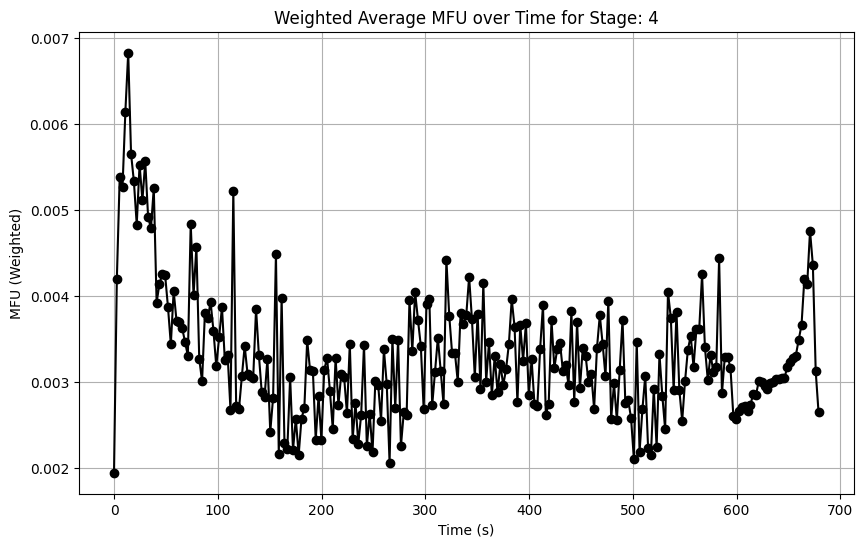

In [ ]:
plot_weighted_avg_mfu_over_time_mod("replica_1_stage_4_mfu", stage=4, color='black', num_bins=250)

# Example Simulation Config 2

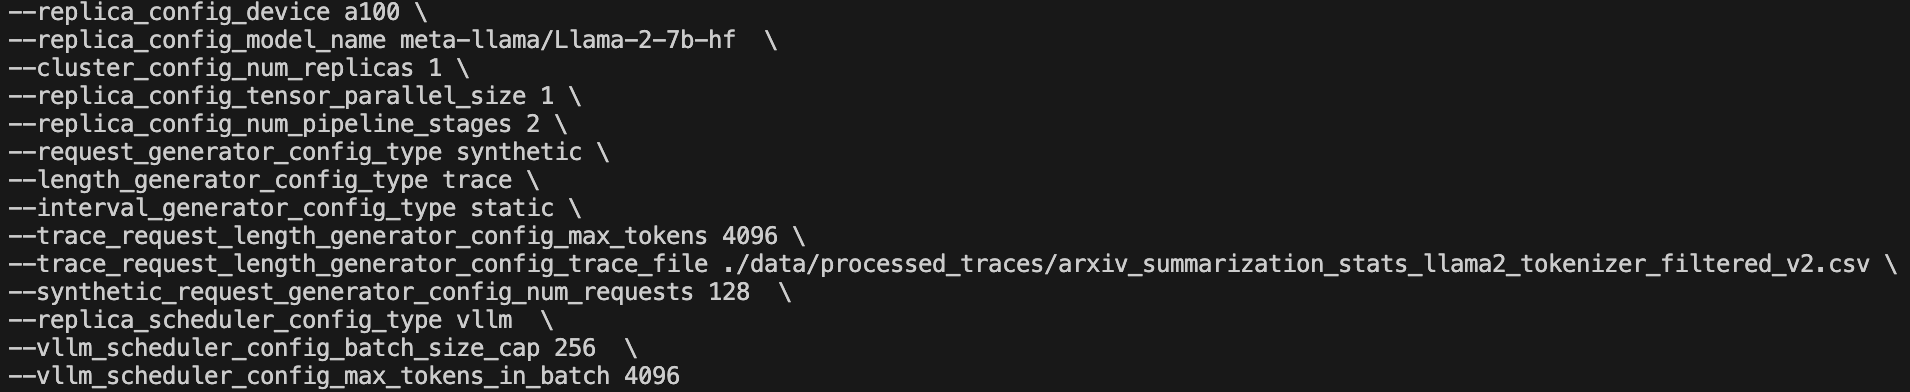

## Stage 1

Distribution length: 8095
Average batch stage execution time: 0.00995469125421226
Max batch stage execution time: 0.1729011676571428
Min batch stage execution time: 0.0


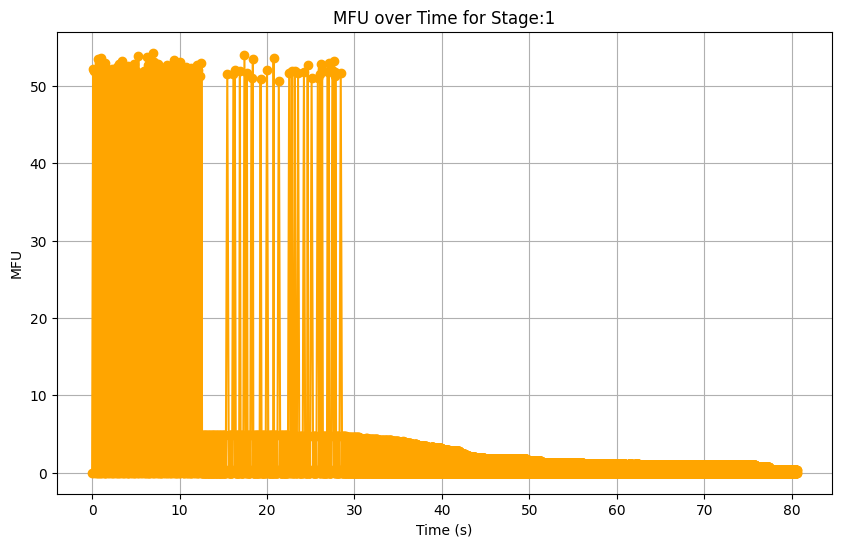

In [ ]:
plot_mfu_over_time("replica_1_stage_1_mfu", stage=1, color ='orange')

Distribution length: 8095


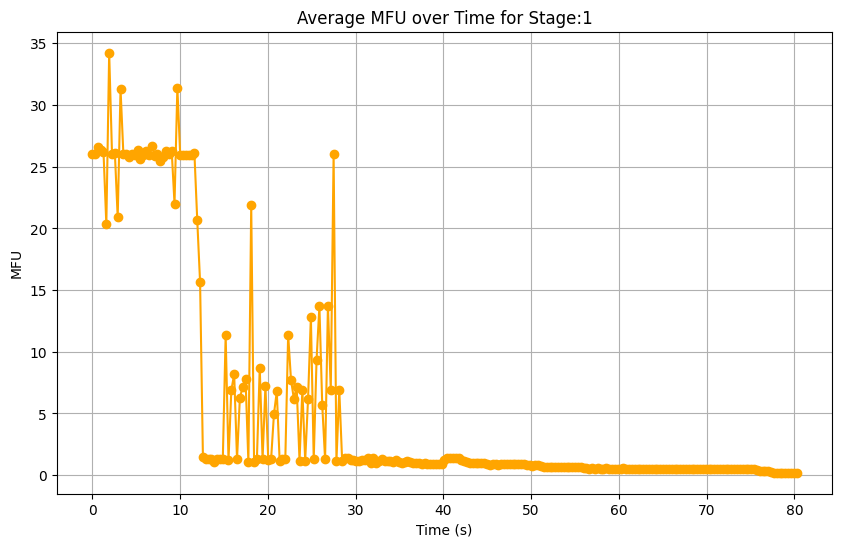

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_1_mfu", stage=1, color ='orange', num_bins=250)

## Stage 2

Distribution length: 8095
Average batch stage execution time: 0.00995402674650891
Max batch stage execution time: 0.17299890625079328
Min batch stage execution time: 0.0


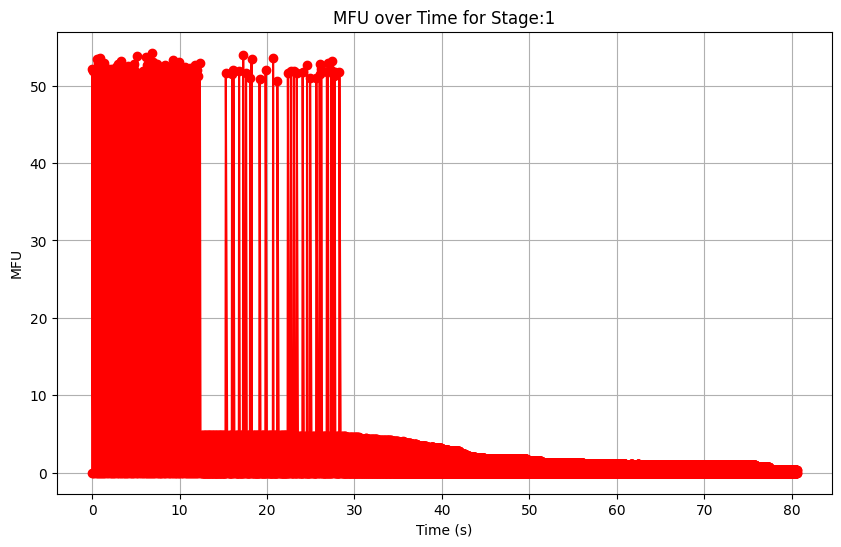

In [ ]:
plot_mfu_over_time("replica_1_stage_2_mfu", stage=1, color ='red')

Distribution length: 8095


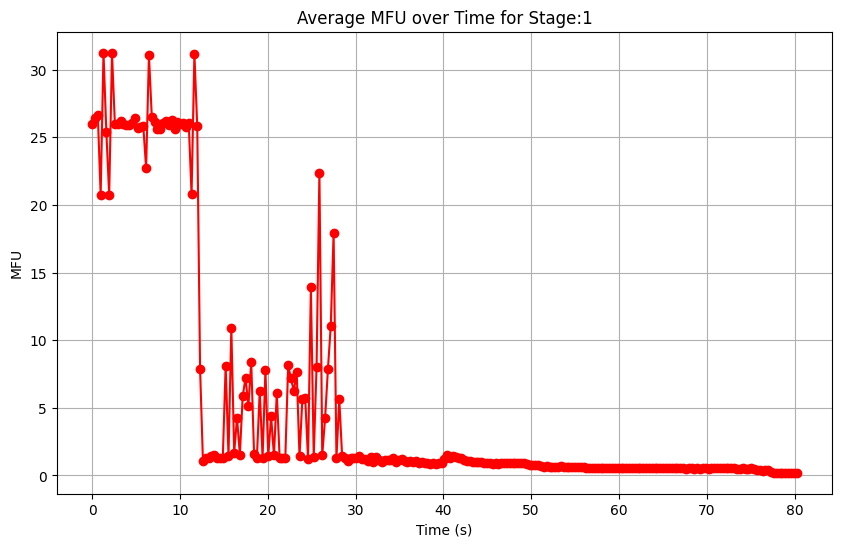

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_2_mfu", stage=1, color ='red', num_bins=250)

# Example Simulation Config 3

Same as config 2, the only change is on num_pipeline_stages (changes from 2 to 1).

Distribution length: 7495
Average batch stage execution time: 0.012312766722124334
Max batch stage execution time: 0.3454789705396806
Min batch stage execution time: 0.0


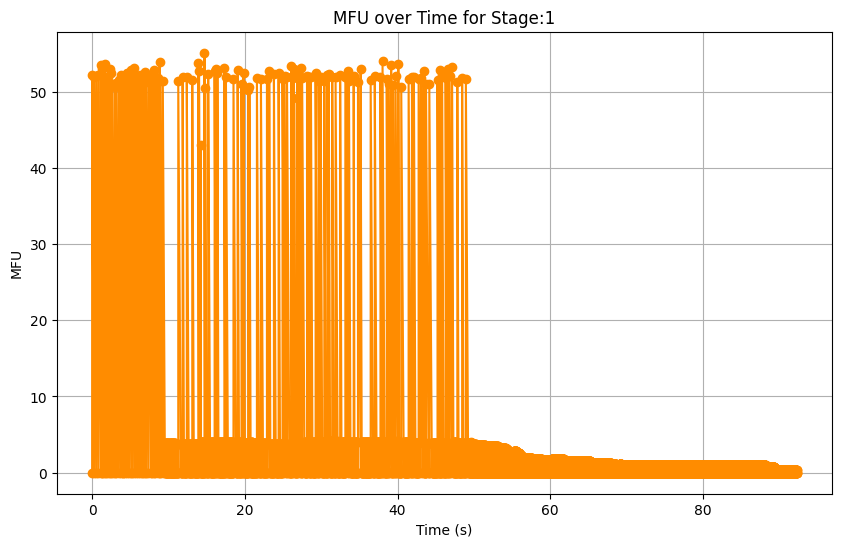

In [ ]:
plot_mfu_over_time("replica_1_stage_1_mfu", stage=1, color ='darkorange')

Distribution length: 7495


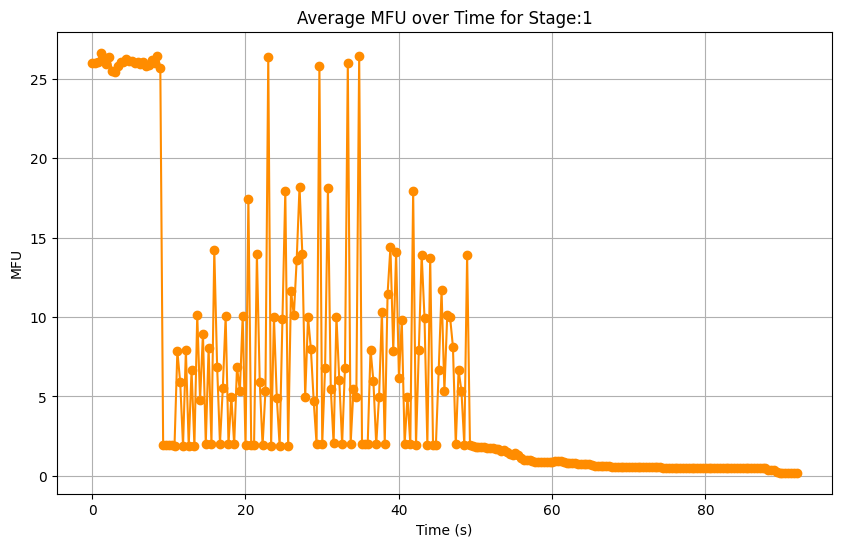

In [ ]:
plot_avg_mfu_over_time("replica_1_stage_1_mfu", stage=1, color ='darkorange', num_bins=250)